# Reverse Diffusion

In this notebook i'm gonna implement the reveerse diffusion, it's giving by:

$$ x_{t-1} = \frac{1}{\sqrt{\alpha_t}}\left(x_t - \frac{\beta_t}{\sqrt{1-\bar\alpha_t}} \epsilon\right) + \sigma_t z $$

This reverses the noise added in the forward diffusion process.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from utils import create_img, plot_img

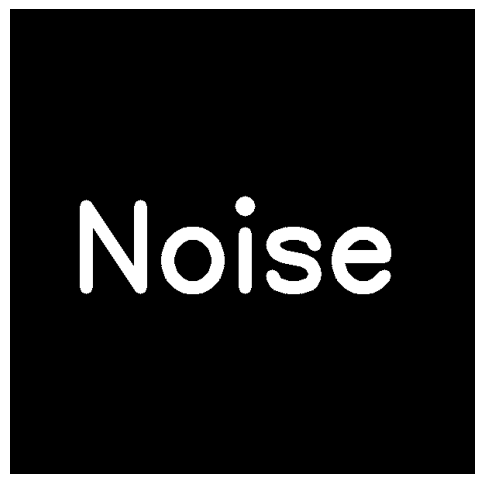

In [2]:
x0 = create_img()
plot_img(x0)

In [3]:
def beta_schedule(b_start = 0.0001, b_end = 0.02, T = 1000):
    return np.linspace(b_start, b_end, T)

In [4]:
def compute_alphas(beta):
    alpha = 1 - beta
    alpha_bar = np.cumprod(alpha)
    return alpha, alpha_bar

In [5]:
T = 20
betas = beta_schedule(T=T)
alphas, alpha_bar = compute_alphas(betas)

In [6]:
def forward_process(x0, betas):
    x0_f = x0.astype(np.float32) / 255.0
    x_t = x0_f.copy()

    steps = []
    epsilons = []

    for t in range(len(betas)):
        beta_t = betas[t]
        alpha_t = 1 - beta_t

        eps = np.random.normal(size=x_t.shape)
        x_t = np.sqrt(alpha_t) * x_t + np.sqrt(1 - alpha_t) * eps

        steps.append(x_t.copy())
        epsilons.append(eps)

    return x_t, steps, epsilons 

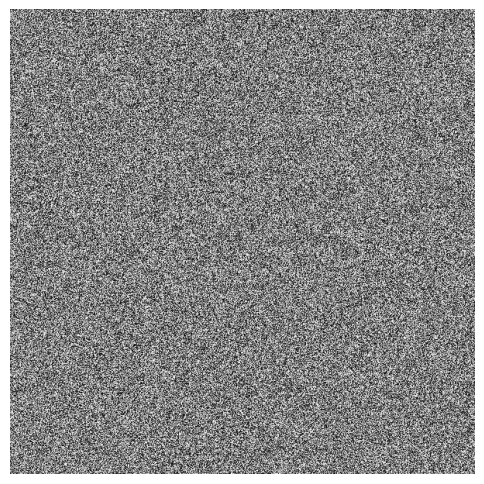

In [7]:
xt, steps, eps_list = forward_process(x0, betas)

plot_img((xt*255).astype(np.uint8)) #last img with noise

In [8]:
def p_sample(xt, t, eps_t, betas, alphas, alpha_bar):
    beta_t = betas[t]
    alpha_t = alphas[t]
    ab_t = alpha_bar[t]

    coeff = (xt - (beta_t / np.sqrt(1 - ab_t)) * eps_t) / np.sqrt(alpha_t)

    if t > 0:
        z = np.random.normal(size=xt.shape)
        sigma_t = np.sqrt(beta_t)
        return coeff + sigma_t * z
    else:
        return coeff

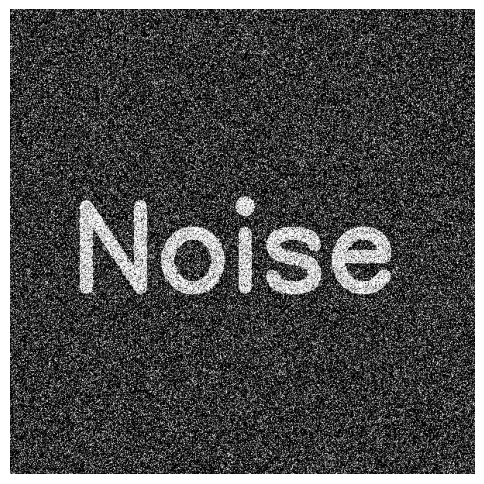

In [9]:
x_rev = xt.copy()
reverse_imgs = [x_rev.copy()]
for t in reversed(range(T)):
    x_rev = p_sample(x_rev, t, eps_list[t], betas, alphas, alpha_bar)
    reverse_imgs.append(x_rev.copy())

plot_img(np.clip(x_rev * 255, 0, 255).astype(np.uint8))


In [10]:
diff = np.abs(x_rev - (x0.astype(np.float32)/255.0)).mean()
diff

np.float64(0.43856621887146824)